## Задание 2

#### Сверточная нейронная сеть для распознавания рукописных цифр (2 слоя)

In [8]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import np_utils 
from keras.optimizers import adam
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# нормализуем и получаем данные от 0 до 1
X_train/=255
X_test/=255

#унитарная кодировка
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes) 

In [31]:
#создание модели сверточной нейронной сети
mymodel = Sequential()
mymodel.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))
mymodel.add(Conv2D(64, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))
mymodel.add(Dropout(0.5))
mymodel.add(Flatten())
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(number_of_classes, activation='softmax'))

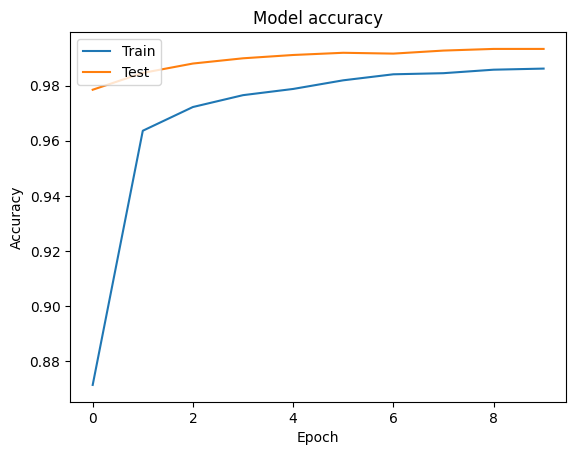

In [32]:
mymodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Дополнительное задание №1

#### Напишем вспомогательные функции

In [27]:
from pathlib import Path
from PIL import Image

def images2arr(path) -> list:
    """
    Функция считывающая все картинки из директории path, 
    reshape'ит их и складывает в lst.
    """
    lst: list = []
    directory_content: list = list(map(str, sorted(Path(path).iterdir())))
    for image_path in directory_content:
        img = np.invert(Image.open(image_path).resize((28,28)).convert('L')).ravel()
        im2arr = img.reshape(1, 28, 28, 1).astype('float32')/255
        lst.append(im2arr)
    return lst

def model_predict(model, lst) -> list:
    """Функция для предсказаний модели."""
    result: list = []
    for arr_img in lst:
        result.append(model.predict(arr_img))
    return result

def test(models, show_array=False) -> list:
    """Функция тестирующая предсказания"""
    true_predict: list = []
    for i in range(len(models)):  
        true_predict.append(i == np.argmax(models[i]))
        if show_array:
            print(models[i])
        print(np.argmax(models[i]), true_predict[i])
    return true_predict

#### Протестируем первую нейросеть(2 сверточных слоя с пулом):

In [33]:
img_list = images2arr('numbers/')

models1 = model_predict(mymodel, img_list)

tests1 = test(models1, show_array=True)

result1 = (sum(tests1) / 10) * 100

print(f'Result: {result1}%')

1/1 [==============================] - 0s 13ms/step
[[8.6144912e-01 7.0829350e-03 4.6604793e-03 4.6125194e-04 1.7380329e-03
  4.6348758e-03 3.8031876e-02 3.2786347e-04 7.3749028e-02 7.8645032e-03]]
0 True
[[1.5404825e-03 9.1477138e-01 7.7724084e-03 5.6274422e-04 3.9714016e-02
  2.8567160e-03 7.9729548e-03 1.8092817e-02 6.0902047e-03 6.2625960e-04]]
1 True
[[3.7209637e-04 3.8631305e-03 8.8146381e-02 3.4009898e-03 8.8463622e-01
  1.1201769e-03 1.6056146e-02 5.2948261e-04 4.4521110e-04 1.4301983e-03]]
4 False
[[1.1801348e-03 1.6031375e-02 1.3697708e-01 5.6346124e-01 7.2308397e-03
  2.2189494e-02 3.4924512e-04 8.5194707e-02 6.9493890e-02 9.7892091e-02]]
3 True
[[1.0925642e-03 3.6674276e-02 1.4428011e-03 7.3702738e-04 7.7617252e-01
  1.7352782e-02 2.8872539e-03 1.7486650e-02 3.4912135e-02 1.1124197e-01]]
4 True
[[1.1620906e-05 3.2246492e-06 1.6481124e-05 1.2556564e-03 4.7990921e-05
  9.1760898e-01 3.9823302e-05 4.5876572e-05 1.8711358e-03 7.9099253e-02]]
5 True
[[1.0092721e-02 7.0364913e-05

#### Напишем вторую нейросеть(с тремя сверточными слоями и пулами)

In [48]:
# создание модели сверточной нейронной сети
mymodel2 = Sequential()
mymodel2.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Conv2D(64, (3, 3), activation='relu'))
mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Conv2D(128, (3, 3), activation='relu'))
mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Dropout(0.5))
mymodel2.add(Flatten())
mymodel2.add(Dense(128, activation='relu'))
mymodel2.add(Dropout(0.5))
mymodel2.add(Dense(number_of_classes, activation='softmax'))

# компилируем модель
mymodel2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# обучаем модель и сохраняем историю обучения
history2 = mymodel2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 16s 52ms/step - loss: 0.6554 - accuracy: 0.7885 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 2/10
300/300 [==============================] - 16s 52ms/step - loss: 0.1935 - accuracy: 0.9449 - val_loss: 0.0656 - val_accuracy: 0.9800
Epoch 3/10
300/300 [==============================] - 16s 54ms/step - loss: 0.1369 - accuracy: 0.9610 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 4/10
300/300 [==============================] - 16s 53ms/step - loss: 0.1093 - accuracy: 0.9692 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 5/10
300/300 [==============================] - 16s 55ms/step - loss: 0.0930 - accuracy: 0.9753 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 6/10
300/300 [==============================] - 17s 55ms/step - loss: 0.0807 - accuracy: 0.9776 - val_loss: 0.0380 - val_accuracy: 0.9896
Epoch 7/10
300/300 [==============================] - 17s 57ms/step - loss: 0.0753 - accuracy: 0.9790 - val_loss: 0.0373 - val_accuracy:

#### Протестируем вторую нейросеть

In [49]:
models2 = model_predict(mymodel2, img_list)

tests2 = test(models2, show_array=True)

result2 = (sum(tests2) / 10) * 100

print(f'Result: {result2}%')

1/1 [==============================] - 0s 14ms/step
[[9.6601105e-01 2.6830108e-04 4.9652747e-04 1.2598641e-04 7.3734089e-04
  1.7280191e-03 1.3812510e-02 7.4049958e-04 4.3363026e-03 1.1743455e-02]]
0 True
[[5.9090648e-04 9.7663695e-01 2.0717236e-03 1.6924808e-03 1.1668744e-02
  4.4510307e-04 3.9150752e-04 3.9018819e-03 1.9834524e-03 6.1723520e-04]]
1 True
[[3.4949710e-03 2.2378000e-03 3.9668313e-01 3.4071261e-03 5.7218641e-01
  9.4455564e-03 4.0343241e-03 2.6459017e-04 7.6392824e-03 6.0686941e-04]]
4 False
[[1.9703853e-07 2.2261949e-05 2.4367564e-05 9.9727577e-01 1.0516832e-07
  1.5682356e-03 8.0785876e-09 1.0019861e-04 2.2051954e-05 9.8665489e-04]]
3 True
[[7.4771111e-04 2.5277797e-02 2.9816828e-03 2.8034840e-03 7.0497996e-01
  2.1468464e-03 1.8991048e-04 2.9398995e-02 3.1815156e-02 1.9965851e-01]]
4 True
[[5.4094124e-07 2.9970963e-08 2.0868390e-07 6.2929641e-05 1.6750337e-07
  9.9967504e-01 3.2645337e-06 4.1569567e-07 2.5086651e-05 2.3236356e-04]]
5 True
[[2.1105884e-03 5.0499457e-05

#### И наконец, третья нейросеть(с 4 сверточными слоями и пулами)

In [50]:
# создание модели сверточной нейронной сети
mymodel3 = Sequential()
mymodel3.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
mymodel3.add(MaxPooling2D(pool_size=(2, 2)))
mymodel3.add(Conv2D(64, (3, 3), activation='relu'))
mymodel3.add(MaxPooling2D(pool_size=(2, 2)))
mymodel3.add(Conv2D(128, (3, 3), activation='relu'))
mymodel3.add(MaxPooling2D(pool_size=(2, 2)))
mymodel3.add(UpSampling2D((2, 2)))  # увеличиваем размерность входных данных
mymodel3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
mymodel3.add(MaxPooling2D(pool_size=(2, 2)))
mymodel3.add(Dropout(0.5))
mymodel3.add(Flatten())
mymodel3.add(Dense(128, activation='relu'))
mymodel3.add(Dropout(0.5))
mymodel3.add(Dense(number_of_classes, activation='softmax'))

# компилируем модель
mymodel3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# обучаем модель и сохраняем историю обучения
history3 = mymodel3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 20s 65ms/step - loss: 0.4281 - accuracy: 0.8641 - val_loss: 0.0908 - val_accuracy: 0.9714
Epoch 2/10
300/300 [==============================] - 20s 66ms/step - loss: 0.1032 - accuracy: 0.9730 - val_loss: 0.0562 - val_accuracy: 0.9834
Epoch 3/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0740 - accuracy: 0.9803 - val_loss: 0.0551 - val_accuracy: 0.9836
Epoch 4/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0550 - accuracy: 0.9858 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 5/10
300/300 [==============================] - 20s 68ms/step - loss: 0.0471 - accuracy: 0.9874 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 20s 68ms/step - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0459 - val_accuracy: 0.9891
Epoch 7/10
300/300 [==============================] - 20s 68ms/step - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.0373 - val_accuracy:

#### Протестируем третью нейросеть

In [51]:
models3 = model_predict(mymodel3, img_list)

tests3 = test(models3, show_array=True)

result3 = (sum(tests3) / 10) * 100

print(f'Result: {result3}%')

1/1 [==============================] - 0s 13ms/step
[[9.9543899e-01 1.1707992e-04 1.3159608e-04 5.0873427e-05 2.1111561e-04
  4.2849404e-04 1.7336417e-03 1.3111153e-04 2.2529704e-04 1.5319308e-03]]
0 True
[[1.2575485e-05 9.9428552e-01 1.2826151e-04 3.0278999e-05 3.0593190e-04
  1.5635256e-05 3.8437447e-05 5.0995508e-03 1.9858076e-05 6.3982705e-05]]
1 True
[[1.13849965e-05 1.42625436e-06 9.99324799e-01 4.92853796e-05
  5.63684211e-04 4.24184265e-07 2.78795733e-06 1.76856192e-05
  2.29021734e-05 5.71114060e-06]]
2 True
[[6.7012996e-05 1.5988533e-03 4.8304332e-04 9.4201684e-01 1.2385735e-05
  4.8805561e-02 4.3930511e-05 6.2927586e-04 1.8530597e-03 4.4899592e-03]]
3 True
[[1.0100364e-03 2.5027042e-02 2.1329070e-03 3.7066755e-04 8.5424453e-01
  7.5174944e-04 4.5141095e-04 1.4059539e-02 1.7041269e-03 1.0024804e-01]]
4 True
[[1.25186625e-05 1.40849318e-06 2.23106056e-07 2.79647775e-05
  6.47108720e-07 9.99458373e-01 1.06730804e-04 1.30410939e-07
  2.66938354e-04 1.25008679e-04]]
5 True
[[0.07

### Результаты

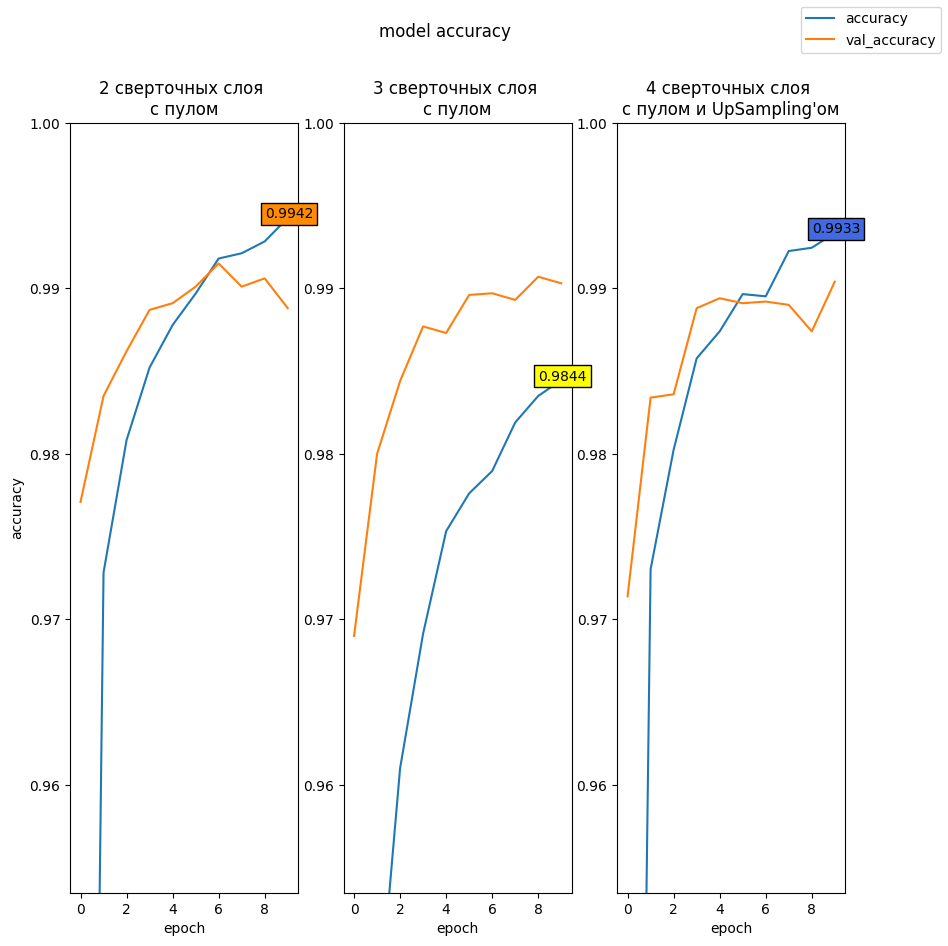

In [98]:
import matplotlib

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

fig.suptitle('model accuracy')

acc_data1 = history.history['accuracy']
acc_data2 = history2.history['accuracy']
acc_data3 = history3.history['accuracy']

axs[0].set_title('2 сверточных слоя \nс пулом')
axs[0].plot(acc_data)
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
#axs[0].set_xlim([1, 10])
axs[0].set_ylim([history.history['val_accuracy'][1] - 0.03, 1])
axs[0].text(
    8, acc_data1[-1], 
    f"{acc_data1[-1]:.{4}f}",
    bbox=dict(
        boxstyle="square", 
        facecolor="darkorange", 
        edgecolor="black"
    )
) 
#axs[0].text(np.argmax(acc_data), np.argmax(acc_data), np.argmax(acc_data))

axs[1].set_title('3 сверточных слоя \nс пулом')
axs[1].plot(history2.history['accuracy'])
axs[1].plot(history2.history['val_accuracy'])
axs[1].set_xlabel('epoch')
#axs[1].set_xlim([1, 10])
axs[1].set_ylim([history.history['val_accuracy'][1] - 0.03, 1])
axs[1].text(
    8, acc_data2[-1], 
    f"{acc_data2[-1]:.{4}f}",
    bbox=dict(
        boxstyle="square", 
        facecolor="yellow", 
        edgecolor="black"
    )
) 

axs[2].set_title("4 сверточных слоя \nс пулом и UpSampling'ом")
axs[2].plot(history3.history['accuracy'])
axs[2].plot(history3.history['val_accuracy'])
axs[2].set_xlabel('epoch')
#axs[2].set_xlim([1, 10])
axs[2].set_ylim([history.history['val_accuracy'][1] - 0.03, 1])
axs[2].text(
    8, acc_data3[-1], 
    f"{acc_data3[-1]:.{4}f}",
    bbox=dict(
        boxstyle="square", 
        facecolor="royalblue", 
        edgecolor="black"
    )
) 

fig.legend(['accuracy', 'val_accuracy'], loc='upper right')

plt.show()

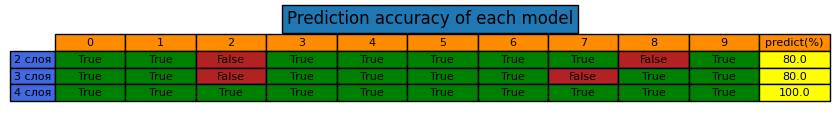

In [159]:
from copy import deepcopy

fig, ax = plt.subplots()

images = [plt.imread(img_path) for img_path in list(map(str, sorted(Path('for_table/').iterdir())))]

fig.suptitle('Prediction accuracy of each model', bbox=dict(
        boxstyle="square", 
        edgecolor="black"
    ))

fig.set_figheight(1.199999999)
fig.set_figwidth(10)

row1 = deepcopy(tests1)
row2 = deepcopy(tests2)
row3 = deepcopy(tests3)

row1.append(result1)
row2.append(result2)
row3.append(result3)

table = ax.table(
    cellText=[
        row1, row2, row3
    ], 
    colLabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'predict(%)'],
    rowLabels=['2 слоя', '3 слоя', "4 слоя"],
    cellLoc='center',
    loc='center',
    rowColours=['royalblue' for _ in range(6)],
    colColours=['darkorange' for _ in range(11)]
)

cells = table.get_celld()
for index, cell in cells.items():
    if index[0] not in (0, -1) and index[1] != -1:
        cell.set_facecolor('green') if cell.get_text().get_text() == 'True' else cell.set_facecolor('firebrick')
    if index[1] == 10 and index[0] != 0:
        cell.set_facecolor('yellow')
        
ax.axis('tight')
ax.axis('off')

plt.show()

## Дополнительное задание №2

In [160]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)
print(model.summary())

553467096/553467096 [==============================] - 84s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [163]:
img_path = 'elephant.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

1/1 [==============================] - 0s 325ms/step


In [164]:
from tensorflow.keras.applications.vgg16 import decode_predictions
label = decode_predictions(pred)
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

print('Predicted:', decode_predictions(pred, top=3)[0])

35363/35363 [==============================] - 0s 1us/step
African_elephant (35.16%)
Predicted: [('n02504458', 'African_elephant', 0.3515931), ('n02504013', 'Indian_elephant', 0.24570377), ('n01871265', 'tusker', 0.16687943)]
